In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
plt.rcParams.update(
    {
        "axes.grid": True,
        "grid.alpha": 0.5,
        "grid.linestyle": "--"
    }
)


## Import data

In [3]:
df = pd.read_csv("../data/FS_features_ABIDE_males.csv", sep=";")
df = df.set_index("FILE_ID")

# drop target
y = df["AGE_AT_SCAN"]
df = df.drop("AGE_AT_SCAN", axis=1)

print("Number of istances: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of istances:  915
Number of columns:  422


In [4]:
df.head()

,SEX,FIQ,DX_GROUP,lh_caudalanteriorcingulate_SurfArea,lh_caudalanteriorcingulate_GrayVol,lh_caudalanteriorcingulate_ThickAvg,lh_caudalanteriorcingulate_ThickStd,lh_caudalanteriorcingulate_MeanCurv,lh_caudalanteriorcingulate_CurvInd,lh_caudalmiddlefrontal_SurfArea,...,CC_Mid_Anterior_Volume_mm3,CC_Anterior_Volume_mm3,lh_MeanThickness,rh_MeanThickness,VentricleChoroidVol,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol
FILE_ID,,,,,,,,,,,,,,,,,,,,,
Caltech_0051456,1,126.0,1,909,2684,2.918,0.481,0.134,1.3,2655,...,788.7,929.8,2.52039,2.52379,42065,258703.4443,262670.1207,262254.9768,265741.1295,701211.5651
Caltech_0051457,1,107.0,1,1425,4623,3.046,0.543,0.116,2.0,3631,...,907.3,1066.6,2.55533,2.56998,28505,321132.1284,317004.7945,304528.2513,301555.0187,841485.9229
Caltech_0051458,1,93.0,1,1205,3940,2.987,0.423,0.104,1.4,2685,...,964.2,1104.3,2.64518,2.63160,13383,266418.9917,266456.1701,271683.1723,266494.7088,726728.1619
Caltech_0051459,1,106.0,1,1413,4711,2.879,0.587,0.120,1.7,3203,...,811.0,1056.7,2.70814,2.72762,6849,307157.4469,310540.0389,258618.7918,255480.2694,794676.4859
Caltech_0051461,1,99.0,1,875,2270,2.473,0.475,0.104,0.7,2453,...,844.8,1015.4,2.59002,2.61012,73159,263932.5269,269417.2519,242330.5838,232809.9268,714122.7788


In [5]:
print("Total number of missing data: ", df.isna().sum().sum())


Total number of missing data:  0


In [6]:
print("dtypes:")
df.dtypes.value_counts()

dtypes:


float64    295
int64      127
dtype: int64

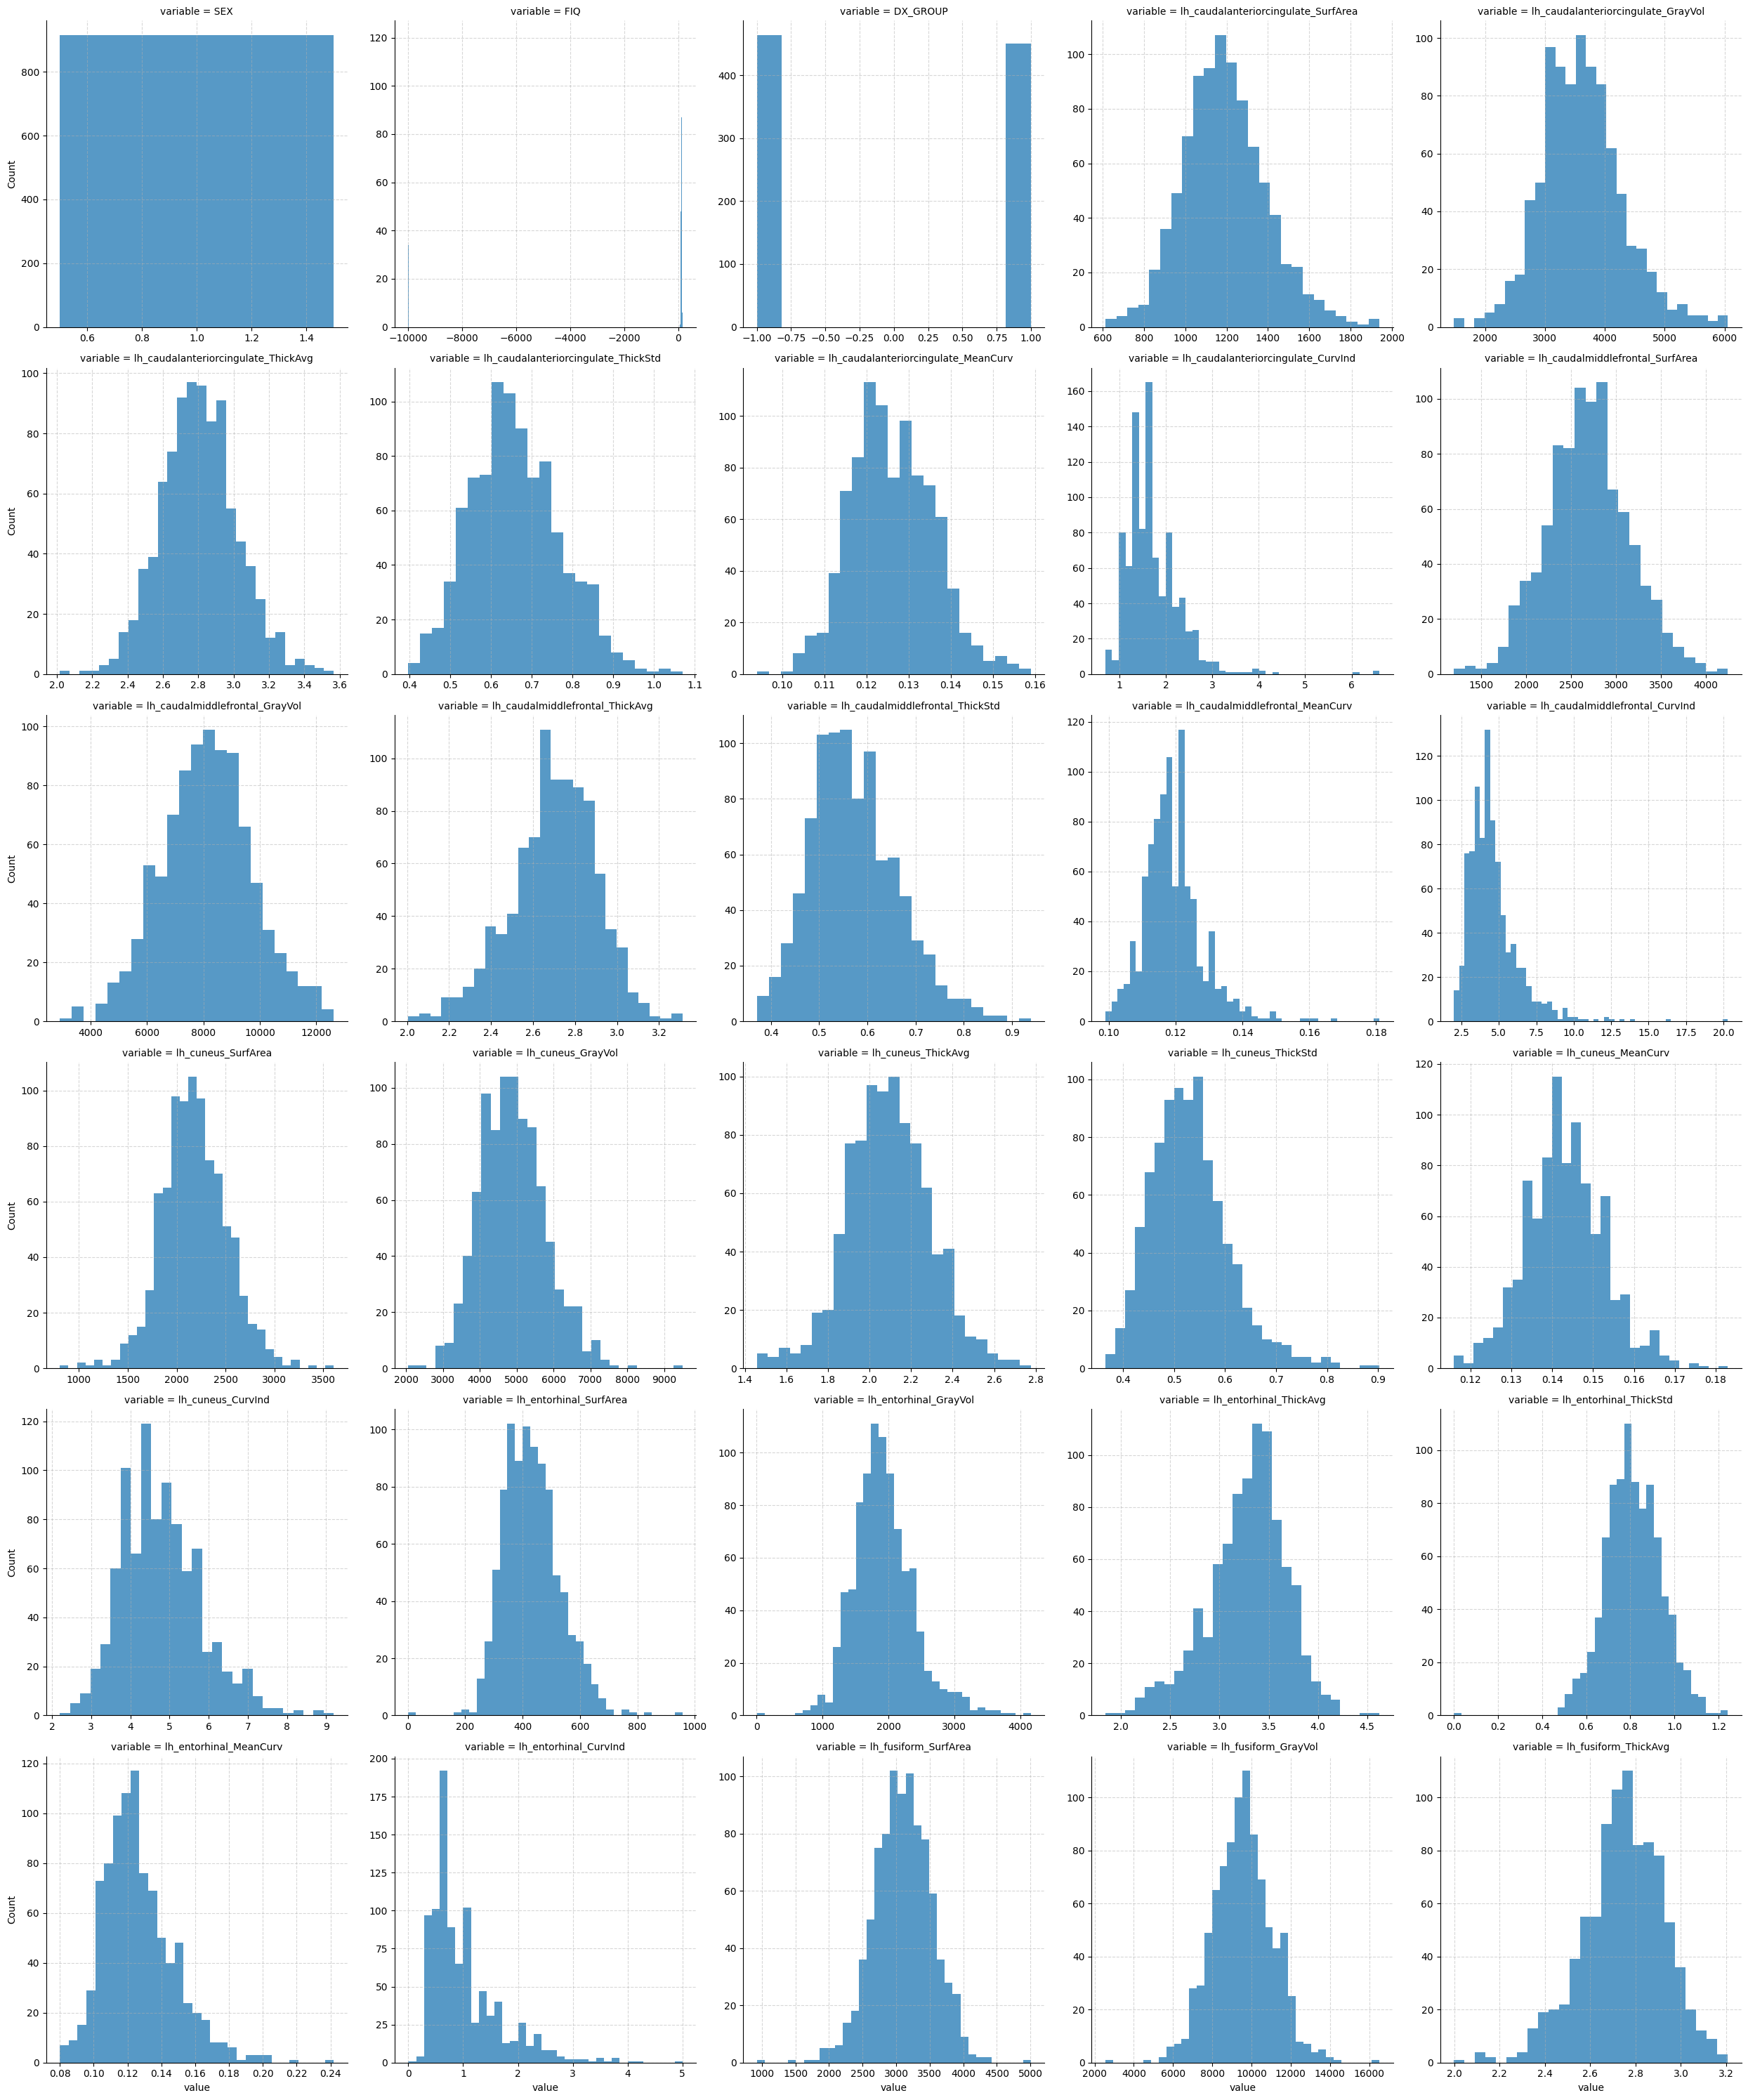

In [7]:
sns.displot(
    data=df.iloc[:, :30].melt(),
    x="value",
    col="variable",
    facet_kws={"sharey":False, "sharex":False},
    common_bins=False,
    col_wrap=5
)

## Descriptive statistics

In [18]:
statistics = ["max", "min", "mean", "std", "skew", "kurtosis"]
df_stats = df.apply(statistics).T
df_stats["varcoeff"] = df_stats["std"] / df_stats["mean"]
df_stats["range"] = df_stats["max"] - df_stats["mean"]

df_stats["IQR_range"] = df.quantile(0.75, axis=0) -  df.quantile(0.25, axis=0)

df_stats_long = df_stats.melt(var_name="statistic")

In [19]:
df_stats_long.sample(5)

,statistic,value
2953,varcoeff,0.096091
2948,varcoeff,0.530634
2866,varcoeff,0.182408
1818,skew,0.100201
2420,kurtosis,0.342326


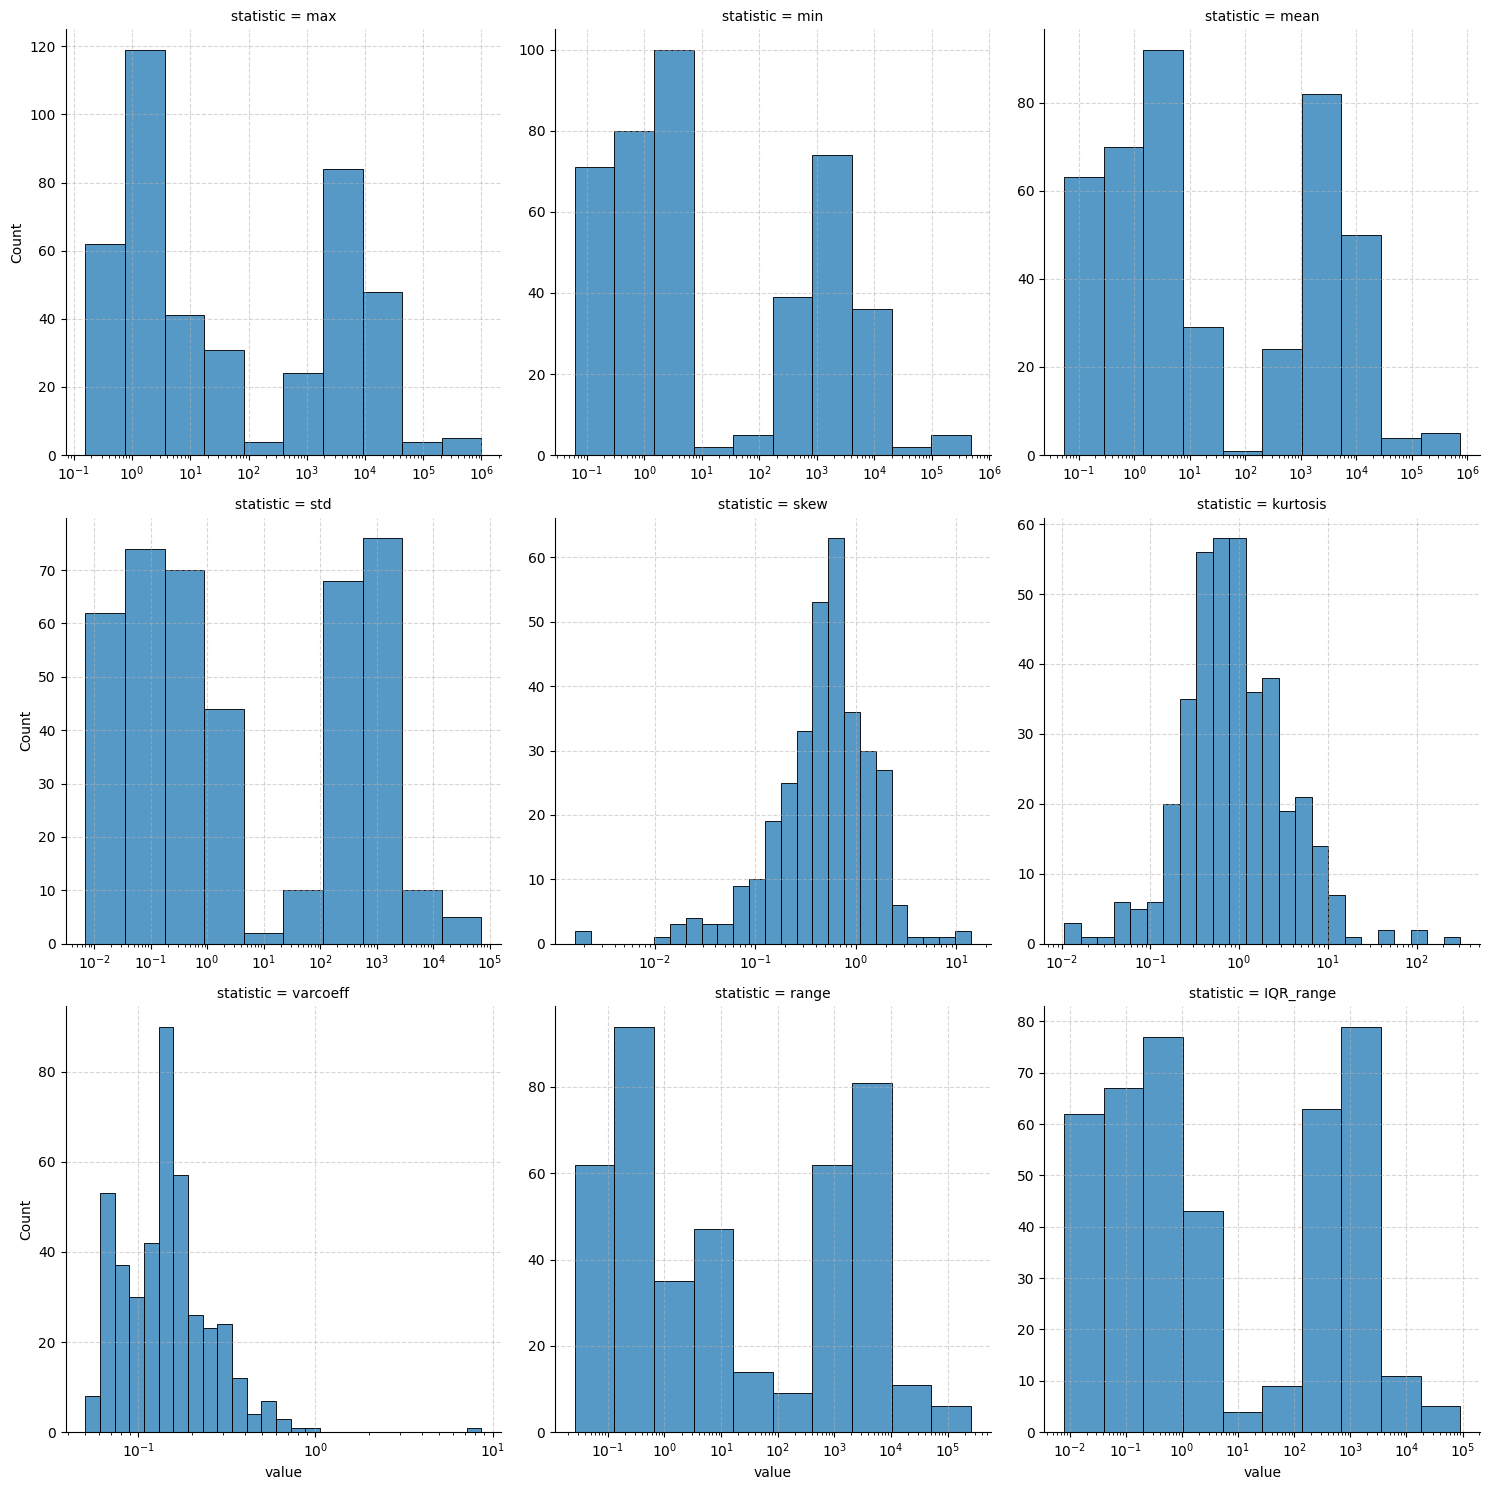

In [21]:
sns.displot(
    data=df_stats_long,
    x="value",
    col="statistic",
    facet_kws={"sharey":False, "sharex":False},
    common_bins=False,
    col_wrap=3,
    log_scale=True

)


## Correlation

<Axes: >

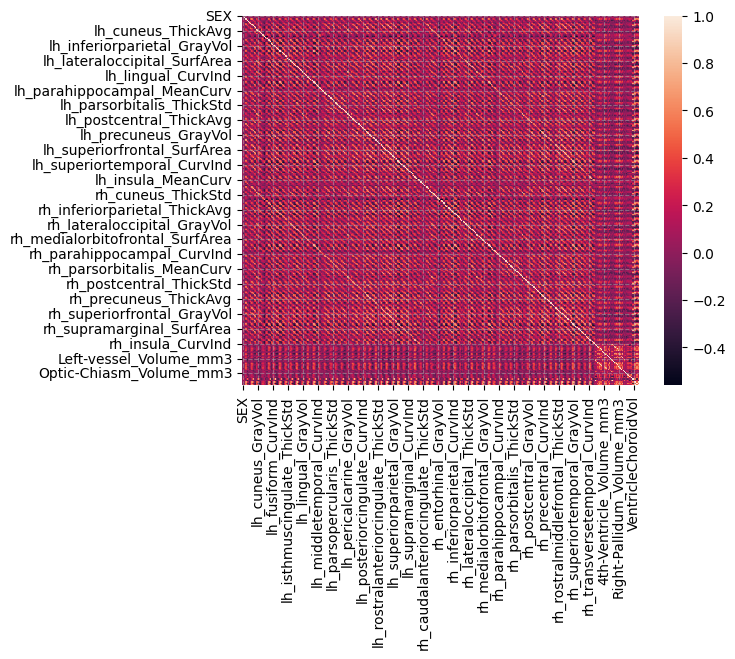

In [22]:
df_corr = df.corr().fillna(0)
sns.heatmap(df_corr)

Text(0.5, 0, 'pearson correlation coefficient')

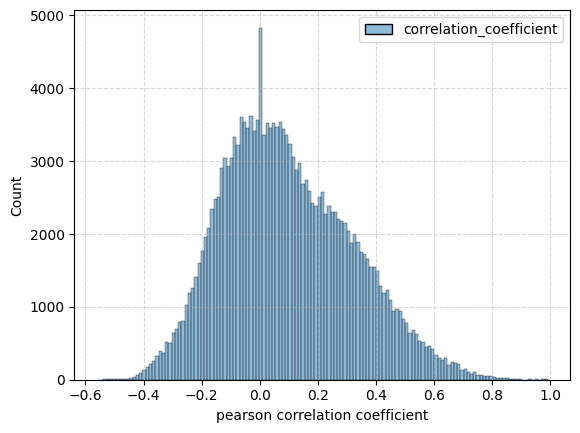

In [23]:
np.fill_diagonal(df_corr.values, 0)
bivariate_corr = df_corr.unstack().rename("correlation_coefficient").to_frame()
sns.histplot(bivariate_corr)
plt.xlabel("pearson correlation coefficient")

In [24]:
df_corr[df_corr < 0.70] = 0
corr_graph = nx.from_pandas_adjacency(df_corr)
connected_components = list(nx.connected_components(corr_graph))

In [25]:
high_corr_components = [component for component in connected_components if len(component) > 3]

print("Clusters of features with high correlation:", len(high_corr_components))


Clusters of features with high correlation: 10


In [26]:
for i, component  in enumerate(high_corr_components, start=1):
    print(f"Component {i}:")
    print(component)
    print("-----------------\n")

Component 1:
{'lh_superiorparietal_SurfArea', 'rh_inferiortemporal_SurfArea', 'rh_precuneus_GrayVol', 'rh_fusiform_GrayVol', 'lh_inferiorparietal_GrayVol', 'lh_lateralorbitofrontal_SurfArea', 'rh_insula_SurfArea', 'lh_middletemporal_GrayVol', 'rh_medialorbitofrontal_GrayVol', 'rh_rostralanteriorcingulate_GrayVol', 'lhCortexVol', 'rh_supramarginal_GrayVol', 'rh_inferiorparietal_SurfArea', 'rh_fusiform_SurfArea', 'rh_postcentral_SurfArea', 'rh_inferiortemporal_GrayVol', 'lh_superiorparietal_GrayVol', 'rh_superiorparietal_SurfArea', 'lh_medialorbitofrontal_GrayVol', 'rh_insula_GrayVol', 'lh_insula_SurfArea', 'lh_precentral_SurfArea', 'rh_postcentral_GrayVol', 'rh_superiorparietal_GrayVol', 'rh_lateralorbitofrontal_SurfArea', 'rh_middletemporal_GrayVol', 'lh_lateralorbitofrontal_GrayVol', 'rh_medialorbitofrontal_SurfArea', 'lh_inferiortemporal_GrayVol', 'lh_inferiortemporal_SurfArea', 'rh_inferiorparietal_GrayVol', 'rh_lateralorbitofrontal_GrayVol', 'lh_rostralanteriorcingulate_SurfArea', 

## Correlation with the target

Text(0.5, 0, 'Correlation with the target')

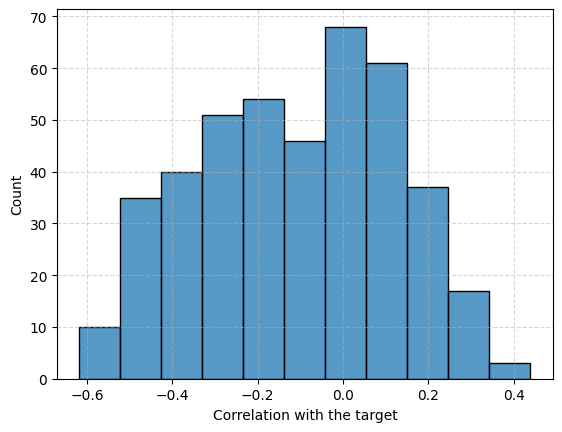

In [34]:
df_with_target = pd.concat([df, y], axis=1)
corr_with_target = df_with_target.corr().fillna(0)["AGE_AT_SCAN"][:-1]

sns.histplot(corr_with_target)
plt.xlabel("Correlation with the target")

In [38]:
print("Top 10 features that are correlated with the target")
np.abs(corr_with_target).sort_values(ascending=False).head(10)

Top 10 features that are correlated with the target


rh_precuneus_ThickAvg           0.617858
lh_precuneus_ThickAvg           0.603758
rh_MeanThickness                0.586038
lh_MeanThickness                0.582304
lh_cuneus_ThickAvg              0.560151
lh_inferiorparietal_ThickAvg    0.560033
rh_lingual_ThickAvg             0.555807
lh_paracentral_ThickAvg         0.555282
lh_lingual_ThickAvg             0.549584
rh_cuneus_ThickAvg              0.531553
Name: AGE_AT_SCAN, dtype: float64